In [352]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

%matplotlib inline

In [353]:
## Read the csv file

df = pd.read_csv("Pima_Indian_diabetes.csv") 

In [354]:
## Describe the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [331]:
print(df[df.Age.isnull() == True].groupby('Outcome')['BloodPressure'].count())

Outcome
0     8
1    11
Name: BloodPressure, dtype: int64


In [332]:
df.Age.isnull().sum()

19

In [333]:
df.BMI.isnull().sum()

11

In [355]:
## Co-relation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.0890994,0.122399,-0.0995139,-0.0969645,-0.0154301,-0.035988,0.461788,0.194147
Glucose,0.0890994,1,0.139863,0.0726417,0.329784,0.179681,0.124182,0.250379,0.469506
BloodPressure,0.122399,0.139863,1,0.207191,0.0891479,0.274645,0.0399594,0.231473,0.0628176
SkinThickness,-0.0995139,0.0726417,0.207191,1,0.43267,0.381212,0.183684,-0.126011,0.0853659
Insulin,-0.0969645,0.329784,0.0891479,0.43267,1,0.186688,0.185071,-0.0516003,0.130548
BMI,-0.0154301,0.179681,0.274645,0.381212,0.186688,1,0.145734,0.0209178,0.279651
DiabetesPedigreeFunction,-0.035988,0.124182,0.0399594,0.183684,0.185071,0.145734,1,0.0375535,0.173844
Age,0.461788,0.250379,0.231473,-0.126011,-0.0516003,0.0209178,0.0375535,1,0.216095
Outcome,0.194147,0.469506,0.0628176,0.0853659,0.130548,0.279651,0.173844,0.216095,1


In [ ]:
## Box-plot for every columns
## This was done to get information about outliers

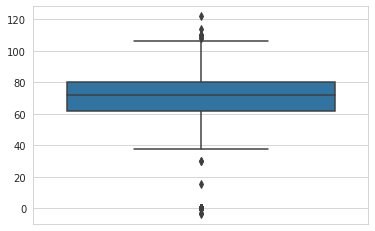

In [335]:
sns.boxplot(y =['BloodPressure'], data = df)

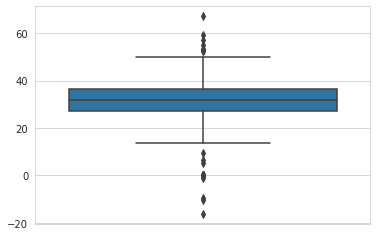

In [336]:
sns.boxplot(y =['BMI'], data = df)

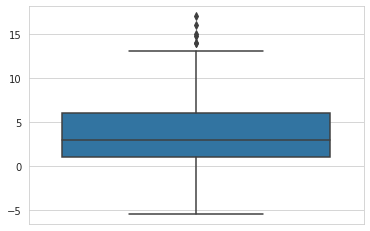

In [337]:
sns.boxplot(y =['Pregnancies'], data = df)

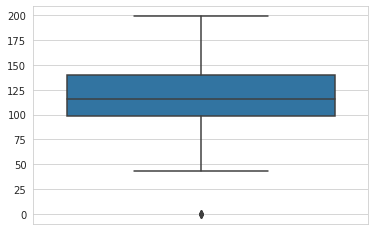

In [338]:
sns.boxplot(y =['Glucose'], data = df)

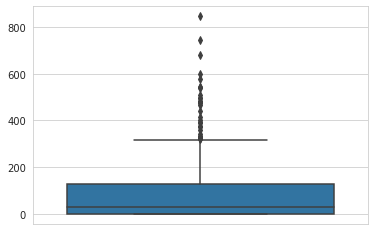

In [339]:
sns.boxplot(y =['Insulin'], data = df)

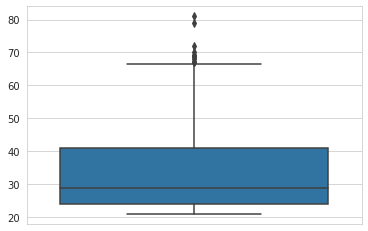

In [340]:
sns.boxplot(y =['Age'], data = df)

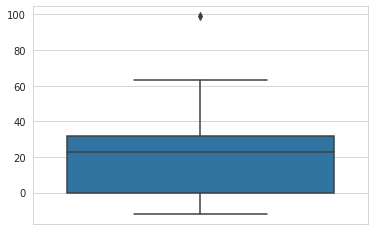

In [341]:
sns.boxplot(y =['SkinThickness'], data = df)

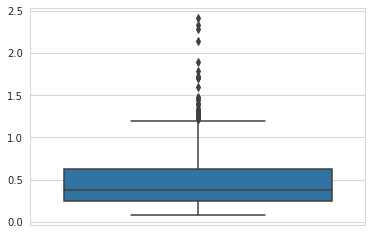

In [342]:
sns.boxplot(y =['DiabetesPedigreeFunction'], data = df)

In [357]:
df.shape

(768, 7)

In [356]:
df = df.drop(['SkinThickness', 'BloodPressure'],axis=1)

In [358]:
age_mean = df.Age.mean()

In [359]:
age_mean

33.76133595599272

In [360]:
## Replacing Null value of age with mean

df.Age.fillna(value = age_mean, inplace = True)

In [367]:
## Replacing Null value of BMI with lower limit of the Box-plot

df.BMI.fillna(value=-1,inplace=True)
for i, row in df.iterrows():
    if (row.BMI < 0):
        df.set_value(i,'BMI',13)    

/home/lami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [368]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,752.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.701846,119.966097,79.799479,31.559712,0.471876,33.761336,0.348958
std,3.532045,32.367659,115.244002,8.356783,0.331329,12.144139,0.476951
min,-5.412815,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,26.800000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,30.500000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,140.000000,127.250000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [369]:
## Replacing Null values of Pregnancies with 0(no pregnancy)

df.Pregnancies.fillna(value= -1 , inplace=True)
for i, row in df.iterrows():
    if (row.Pregnancies < 0):
        df.set_value(i,'Pregnancies',0)

/home/lami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [379]:
## Dropping Null and negative values of Glucose

df.Glucose.fillna(value= -1 , inplace=True)
df = df.drop(df[df.Glucose < 0].index.tolist())

In [380]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.753561,119.966097,78.683511,31.618031,0.472743,33.562883,0.351064
std,3.458099,32.367659,115.032680,8.343119,0.333105,11.811888,0.477621
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,26.800000,0.242500,24.000000,0.000000
50%,3.000000,116.000000,22.500000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,140.000000,126.000000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,72.000000,1.000000


In [390]:
## Divide the dataset into data and outcomes

x = df.iloc[:,0:6]
x.shape

(752, 6)

In [391]:
y = df.iloc[:,6:]

In [392]:
y.shape

(752, 1)

In [393]:
## Co-relation matrix

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.0812595,-0.0972634,-0.00876838,-0.0442942,0.465701,0.184706
Glucose,0.0812595,1,0.329784,0.195371,0.124182,0.24715,0.469506
Insulin,-0.0972634,0.329784,1,0.191621,0.186372,-0.0558683,0.122985
BMI,-0.00876838,0.195371,0.191621,1,0.150249,0.0290838,0.280139
DiabetesPedigreeFunction,-0.0442942,0.124182,0.186372,0.150249,1,0.0394777,0.173513
Age,0.465701,0.24715,-0.0558683,0.0290838,0.0394777,1,0.221909
Outcome,0.184706,0.469506,0.122985,0.280139,0.173513,0.221909,1


In [428]:
## Splitting dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.4,random_state=8)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(752, 6)
(451, 6)
(301, 6)


In [429]:
## Standardizing the input to be fed into PCA

from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [430]:
## PCA on train data

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x_train)
x_train = pd.DataFrame(data = principalComponents)

In [431]:
## PCA on test data

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x_test)
x_test = pd.DataFrame(data = principalComponents)

In [432]:
## MODEL2

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.765
Test set score: 0.777


/home/lami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lami/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [433]:
## CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
y_predicted = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[175,  24],
       [ 43,  59]])

In [434]:
## CLASSIFICATION REPORT

from sklearn.metrics import classification_report
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       199
           1       0.71      0.58      0.64       102

    accuracy                           0.78       301
   macro avg       0.76      0.73      0.74       301
weighted avg       0.77      0.78      0.77       301

